## TE3002B FJ 2024 
### Computer Vision

In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb, rgb2lab, lab2rgb
from skimage.util import random_noise
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter
from scipy.signal import correlate2d
#Not necessary only for jupyterthemes
# from jupyterthemes import jtplot
# jtplot.style()

In [6]:
plots = lambda rows=1, cols=1, figsize=(20,10): plt.subplots(rows, cols, figsize=(figsize))
GREY = plt.cm.gray
REDS = plt.cm.RdBu
GREENS = plt.cm.Greens
BLUES = plt.cm.Blues

### Loading an image

In [8]:
moon = imread('images_class/480px-Full_moon.jpeg')
moon_grey = rgb2gray(moon)
moon.dtype

dtype('uint8')

In [9]:
def imshow_gray(img, size=(10,10)):
    f, ax = plots(figsize=size)
    ax.imshow(img, cmap = GREY), ax.axis('off')
    plt.show()
    
def plot_hist(img, bins=20):
    f, (ax1, ax2) = plots(1, 2)
    ax1.imshow(img, cmap = GREY), ax1.axis('off'), ax1.set_title('Random noise')
    ax2.hist(np.ravel(img), bins=bins, color='gray'), ax2
    plt.show()

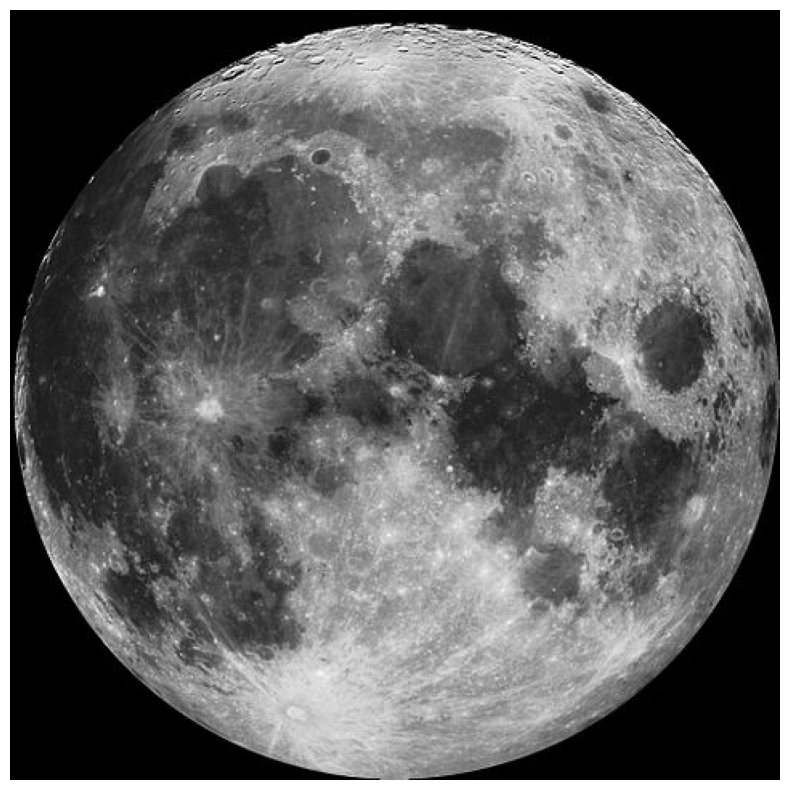

In [10]:
imshow_gray(moon_grey)

### Generate some noise

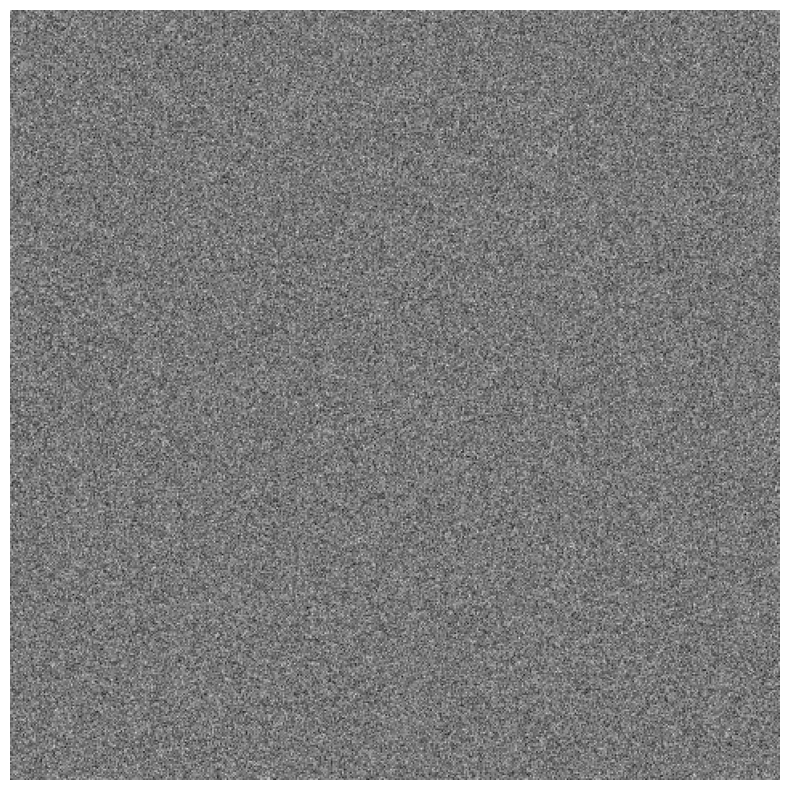

In [11]:
noise1 = np.random.normal(scale = 0.06, size=moon_grey.shape)
imshow_gray(noise1)

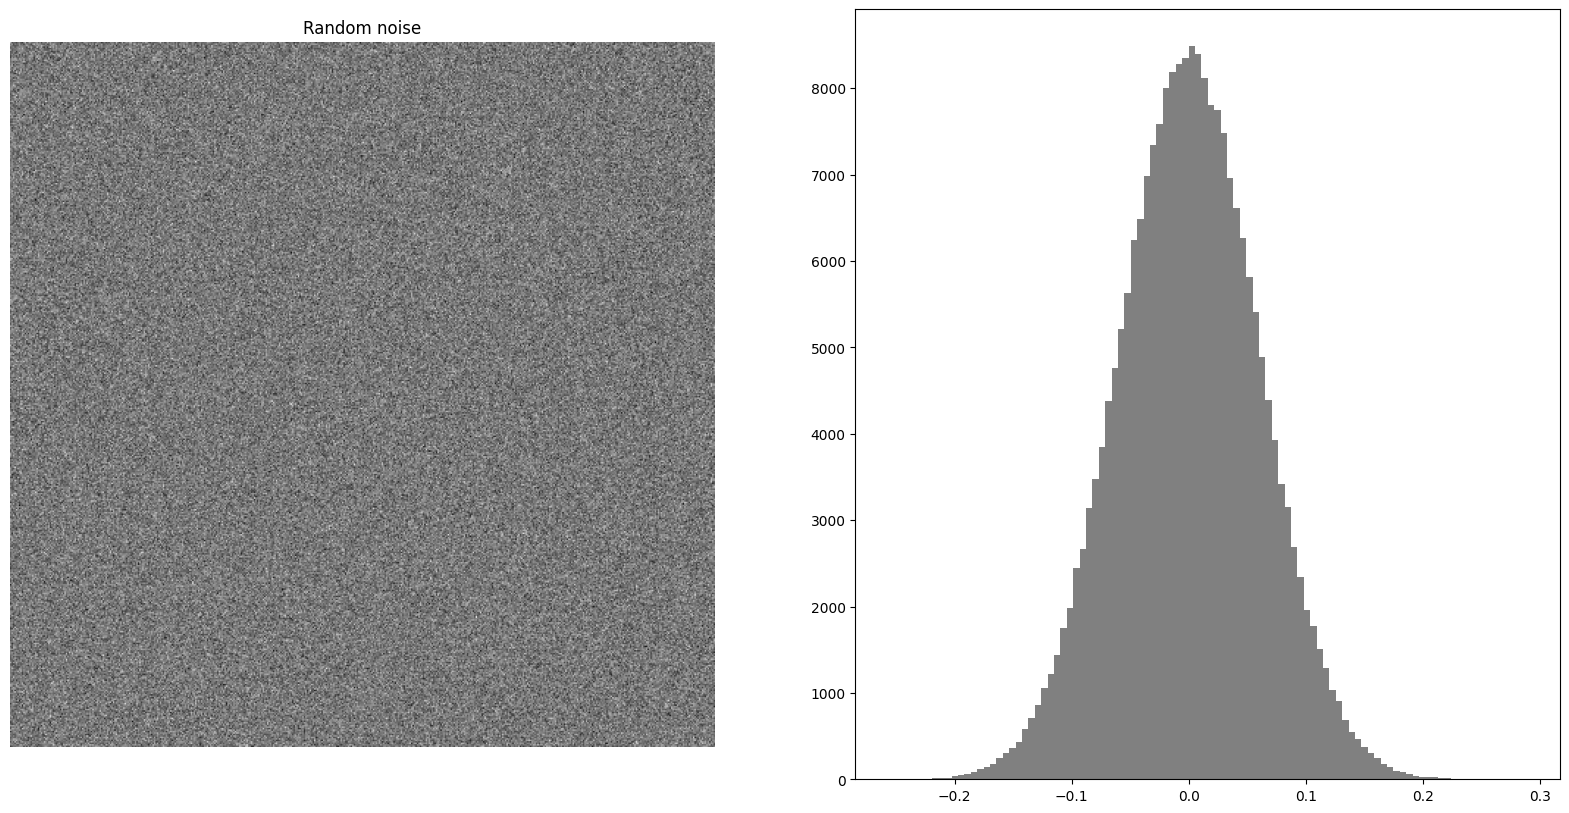

In [12]:
plot_hist(noise1, 100)

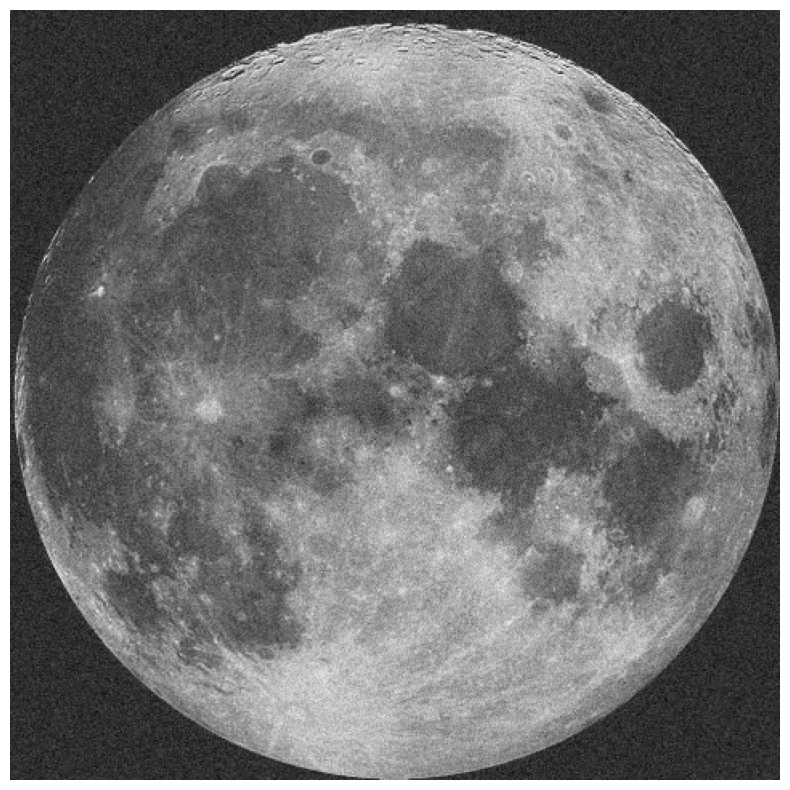

In [13]:
noisy_moon = noise1 + moon_grey
imshow_gray(noisy_moon)

In [14]:
def plot_line(img, position, size = (20,10)):
    f, a = plots(figsize=size)
    a.plot(img[position, :])
    plt.show()

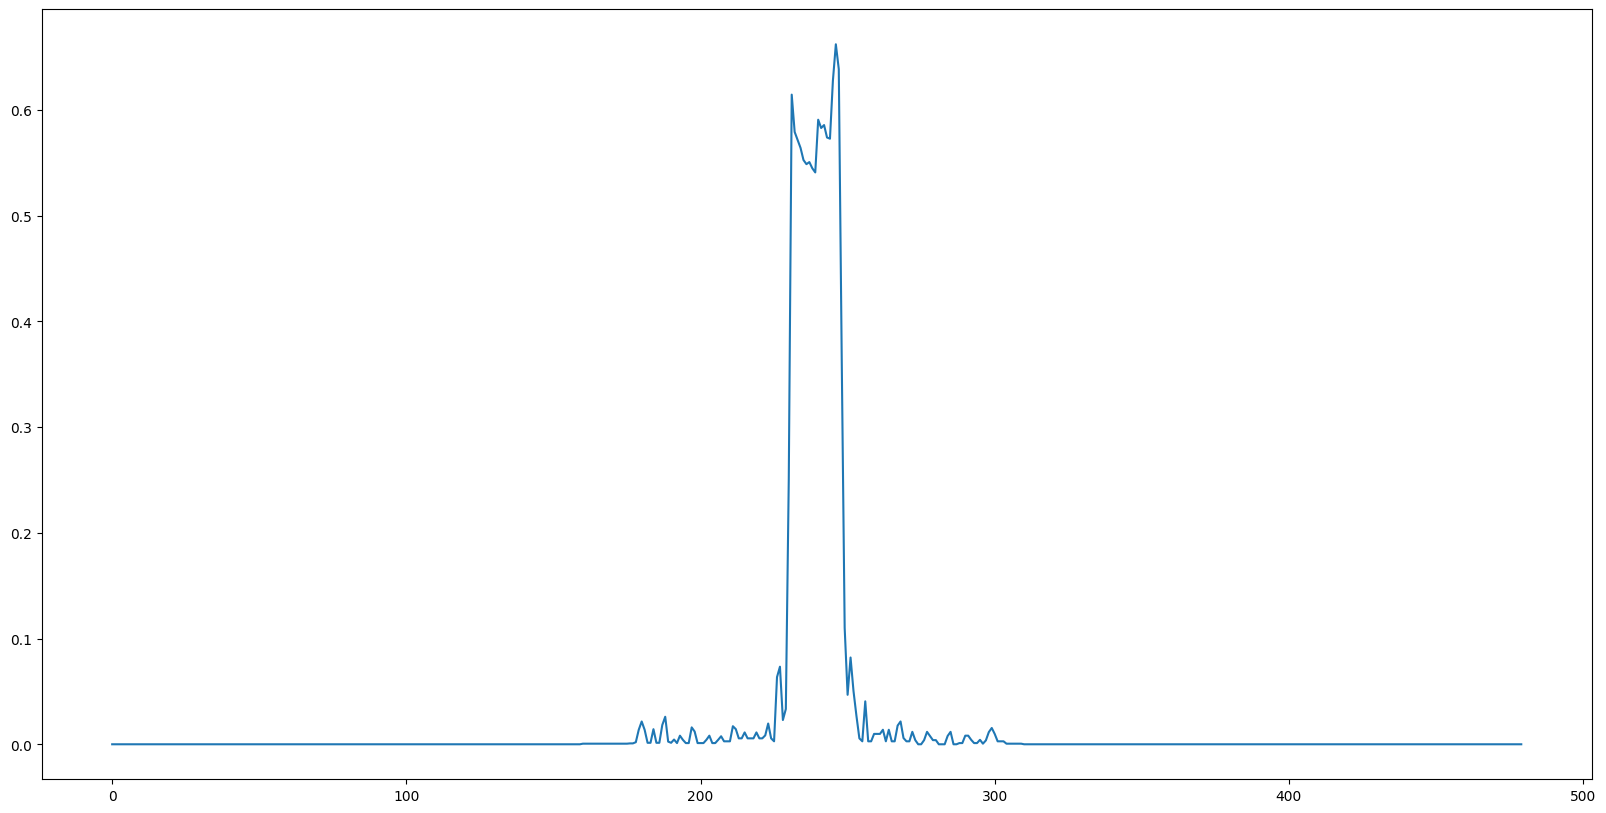

In [15]:
plot_line(moon_grey, 479)

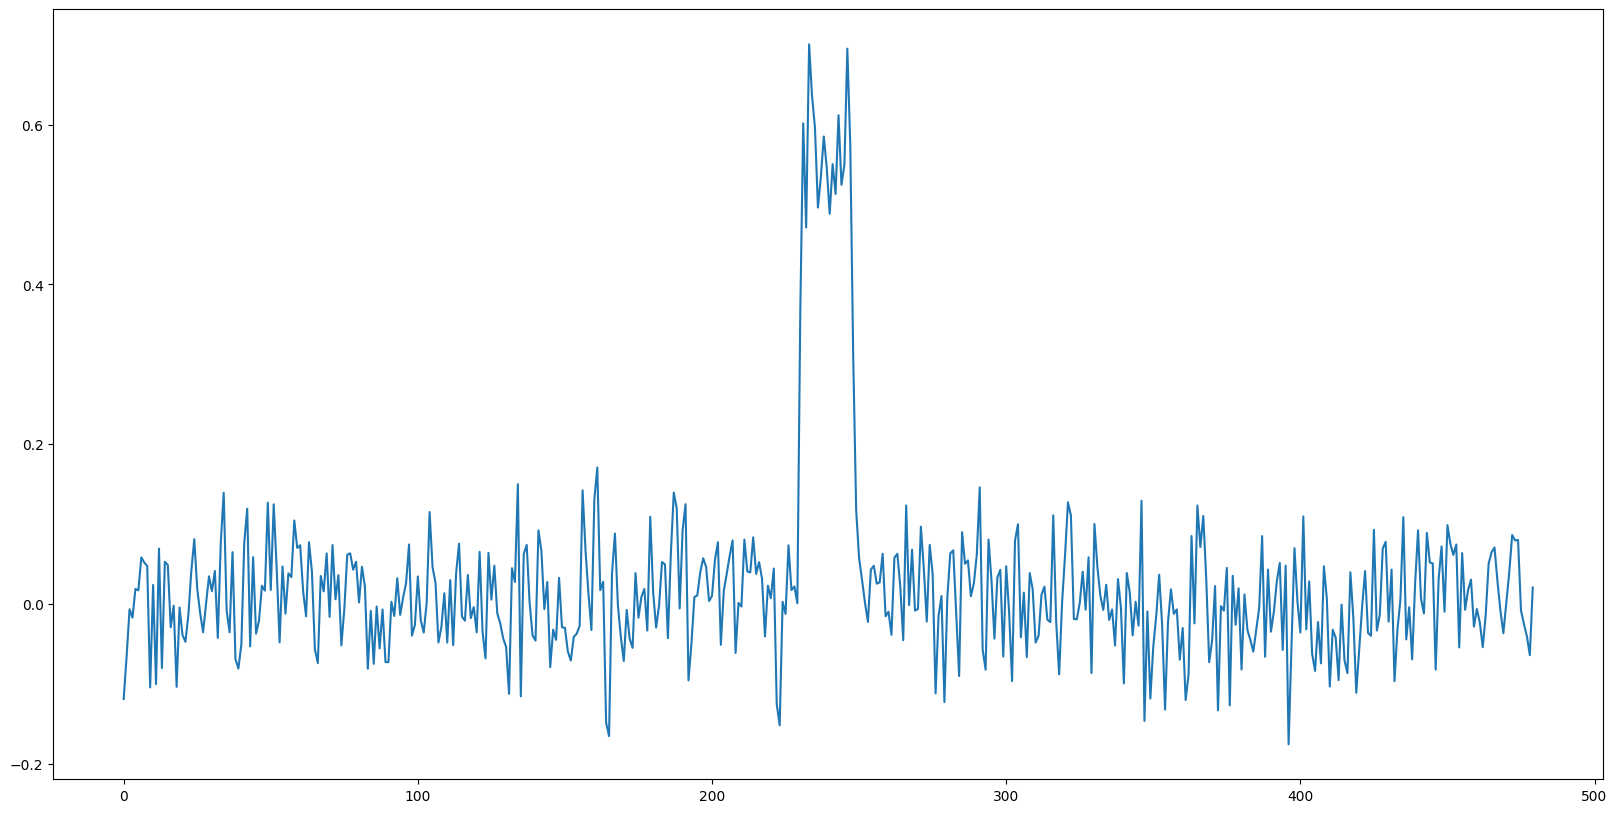

In [16]:
plot_line(noisy_moon, 479)

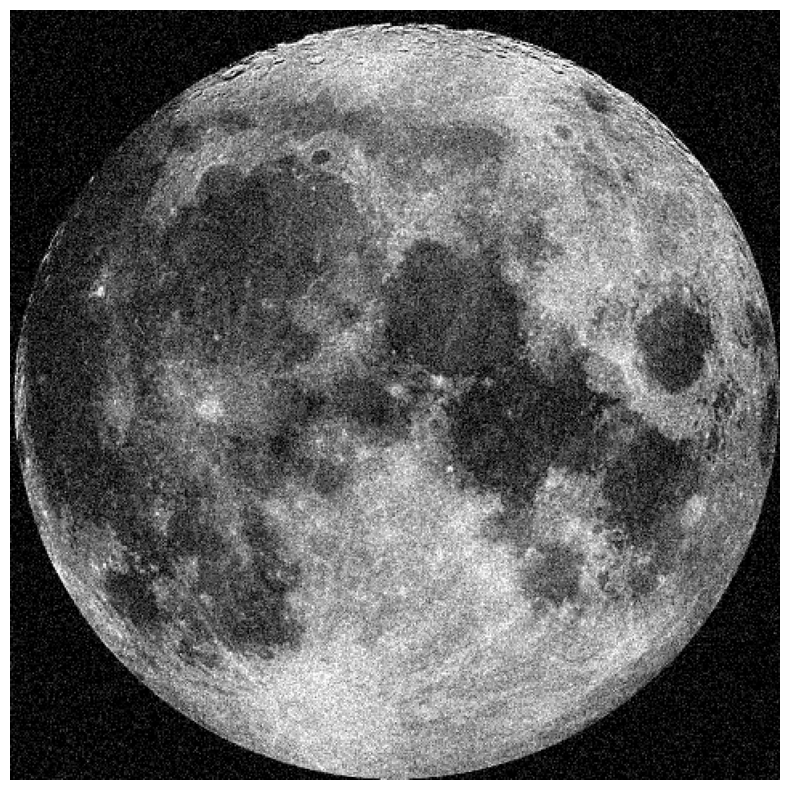

In [17]:
gaussian_moon2 = random_noise(moon_grey, 'gaussian', var=0.01)
imshow_gray(gaussian_moon2)

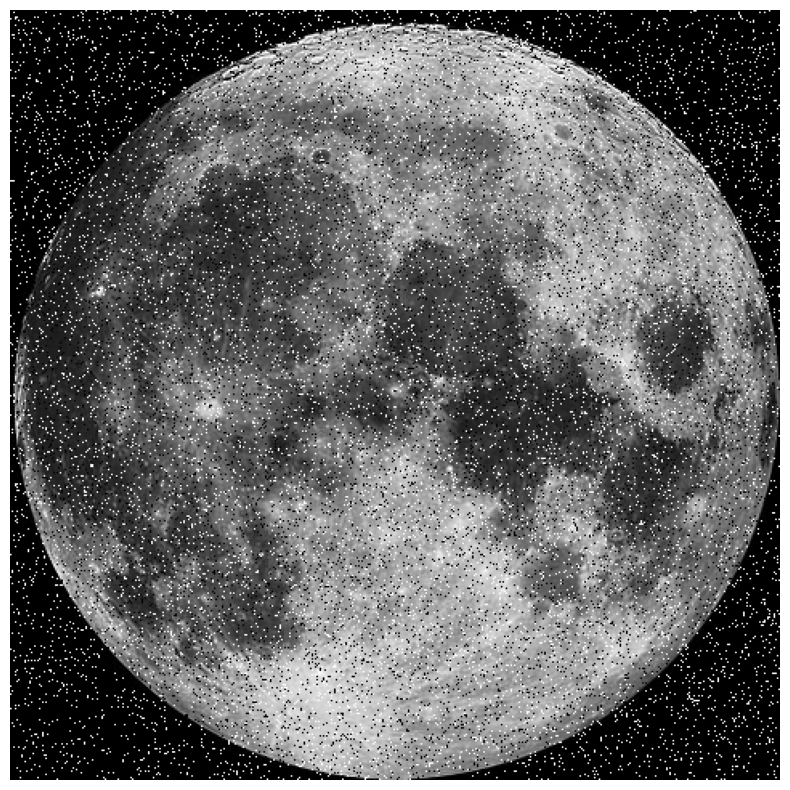

In [18]:
sp_moon = random_noise(moon_grey, 's&p', amount=0.1)
imshow_gray(sp_moon)

### Removing noise

In [27]:
%matplotlib tk
def avg_noise_out(img, N):
    img2 =  img
    for i in range(N):
        img2 = img2+random_noise(img, 'gaussian', var=0.1)
    return img2/N


In [28]:
img2 = avg_noise_out(moon_grey, 10)
imshow_gray(img2)

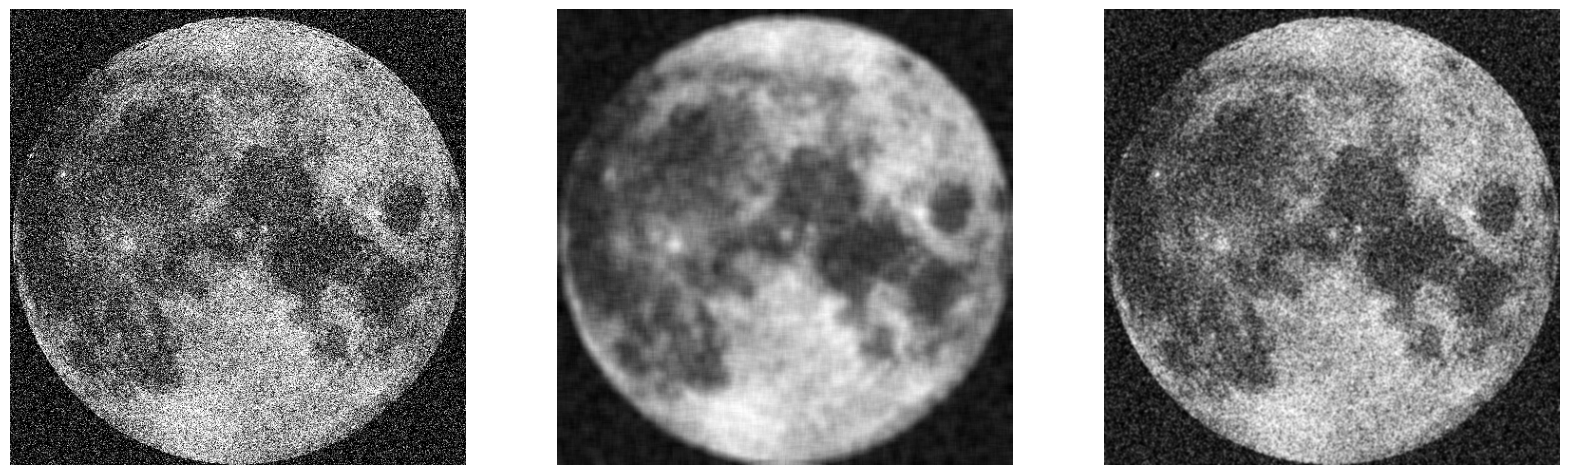

In [30]:
 # of course we don't always have the luxury of acquiring so many images
%matplotlib inline
gaussian_moon2 = random_noise(moon_grey, 'gaussian', var=0.1)
box_filt_moon = uniform_filter(gaussian_moon2, 11)
gau_filt_moon = gaussian_filter(gaussian_moon2, 1)

f, (ax1, ax2, ax3) = plots(1, 3)
ax1.imshow(gaussian_moon2, cmap=GREY), ax1.axis('off')
ax2.imshow(box_filt_moon, cmap=GREY), ax2.axis('off')
ax3.imshow(gau_filt_moon, cmap=GREY), ax3.axis('off')
plt.show()

In [31]:
gaussian_moon2

array([[0.        , 0.32244555, 0.        , ..., 0.        , 0.51499522,
        0.2982636 ],
       [0.        , 0.1840617 , 0.        , ..., 0.        , 0.48645252,
        0.        ],
       [0.46563528, 0.3362521 , 0.        , ..., 0.38504959, 0.        ,
        0.        ],
       ...,
       [0.        , 0.23981097, 0.38821421, ..., 0.        , 0.24977619,
        0.33715597],
       [0.        , 0.        , 0.        , ..., 0.33822667, 0.2552004 ,
        0.09304521],
       [0.        , 0.47175385, 0.21684354, ..., 0.        , 0.43275239,
        0.        ]])

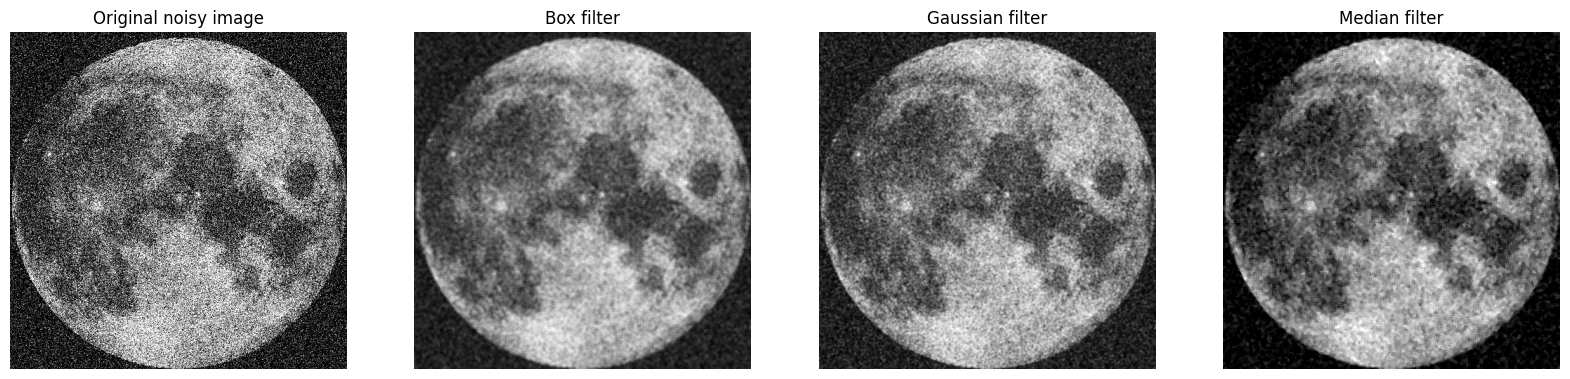

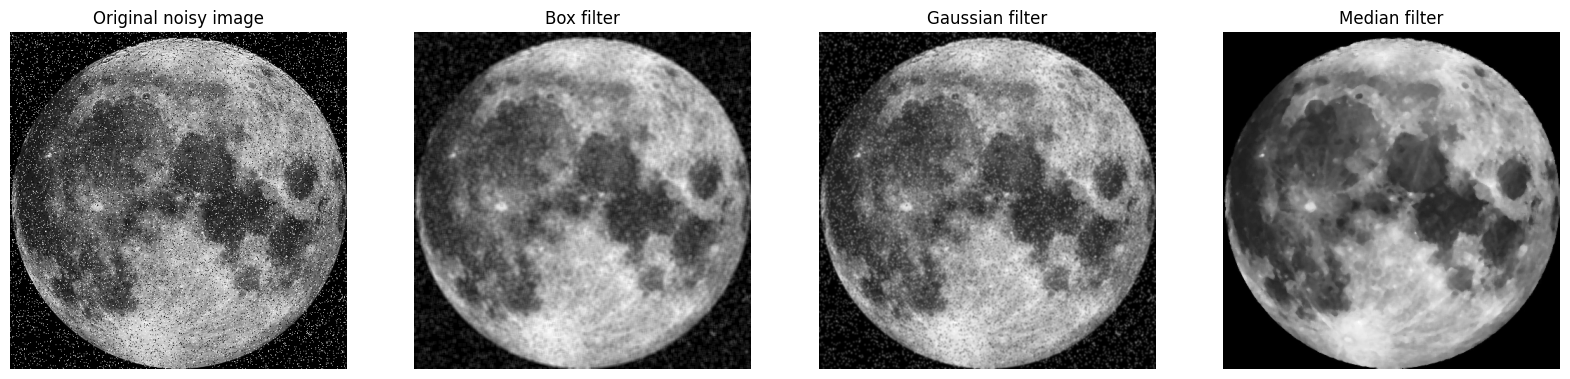

In [32]:
def create_noisy_plots(noisy_image, kernel=5):
    avg_filter = uniform_filter(noisy_image, kernel)
    gau_filter = gaussian_filter(noisy_image, 1)
    med_filter = median_filter(noisy_image, kernel)

    f, ax = plots(1, 4)
    ax[0].imshow(noisy_image, cmap=GREY), ax[0].axis('off'), ax[0].set_title('Original noisy image')
    ax[1].imshow(avg_filter, cmap=GREY), ax[1].axis('off'), ax[1].set_title('Box filter')
    ax[2].imshow(gau_filter, cmap=GREY), ax[2].axis('off'), ax[2].set_title('Gaussian filter')
    ax[3].imshow(med_filter, cmap=GREY), ax[3].axis('off'), ax[3].set_title('Median filter')
    
    plt.show()
    


create_noisy_plots(gaussian_moon2, kernel=5)
create_noisy_plots(sp_moon, kernel=5)
   